<a href="https://colab.research.google.com/github/mahyahashemi/RKHS_Project/blob/main/code_fvs_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn import datasets, svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
N_m=50

In [3]:
url = 'https://raw.githubusercontent.com/mahyahashemi/RKHS_Project/main/datasets/ecoli3.csv'
sample = pd.read_csv(url, on_bad_lines='skip')

In [4]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.2 MB/s 


In [5]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Class'])
encoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


OrdinalEncoder(cols=['Class'])

In [6]:
sample=encoder.fit_transform(sample)

In [7]:
sample=sample.fillna(0)
sample

,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2,Class
0,0.68,0.49,1.00,0.5,0.62,0.55,0.28,1
1,0.75,0.84,0.48,0.5,0.35,0.52,0.33,1
2,0.52,0.44,0.48,0.5,0.37,0.36,0.42,1
3,0.87,0.49,0.48,0.5,0.61,0.76,0.79,2
4,0.41,0.51,0.48,0.5,0.58,0.20,0.31,1
...,...,...,...,...,...,...,...,...
331,0.64,0.81,0.48,0.5,0.37,0.39,0.44,1
332,0.71,0.71,0.48,0.5,0.68,0.43,0.36,1
333,0.53,0.38,0.48,0.5,0.44,0.26,0.36,1
334,0.86,0.39,0.48,0.5,0.59,0.89,0.90,2


In [8]:
pd.unique(sample['Class'])

array([1, 2])

In [24]:
df=sample.values

In [25]:
data= df[:,:-1]
y = df[:,-1]

In [26]:
display(data)
display(y)

array([[0.68, 0.49, 1.  , ..., 0.62, 0.55, 0.28],
       [0.75, 0.84, 0.48, ..., 0.35, 0.52, 0.33],
       [0.52, 0.44, 0.48, ..., 0.37, 0.36, 0.42],
       ...,
       [0.53, 0.38, 0.48, ..., 0.44, 0.26, 0.36],
       [0.86, 0.39, 0.48, ..., 0.59, 0.89, 0.9 ],
       [0.57, 0.59, 0.48, ..., 0.39, 0.47, 0.33]])

array([1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [27]:
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data)
scaler.data_min_

array([0.  , 0.16, 0.48, 0.5 , 0.  , 0.03, 0.  ])

In [28]:
scaler.data_max_

array([0.89, 1.  , 1.  , 1.  , 0.88, 1.  , 0.99])

In [31]:
scaler.transform(data)  #(x-min)/(max-min)

array([[0.76404494, 0.39285714, 1.        , ..., 0.70454545, 0.53608247,
        0.28282828],
       [0.84269663, 0.80952381, 0.        , ..., 0.39772727, 0.50515464,
        0.33333333],
       [0.58426966, 0.33333333, 0.        , ..., 0.42045455, 0.34020619,
        0.42424242],
       ...,
       [0.59550562, 0.26190476, 0.        , ..., 0.5       , 0.2371134 ,
        0.36363636],
       [0.96629213, 0.27380952, 0.        , ..., 0.67045455, 0.88659794,
        0.90909091],
       [0.64044944, 0.51190476, 0.        , ..., 0.44318182, 0.45360825,
        0.33333333]])

In [32]:
from sklearn.preprocessing import normalize

In [35]:
A=normalize(data,norm='l2',axis=0)
A

array([[0.06914677, 0.05126651, 0.10839486, ..., 0.06570994, 0.05509545,
        0.02819798],
       [0.07626482, 0.08788544, 0.05202953, ..., 0.03709432, 0.05209025,
        0.03323334],
       [0.05287694, 0.04603523, 0.05202953, ..., 0.039214  , 0.03606248,
        0.04229697],
       ...,
       [0.0538938 , 0.0397577 , 0.05202953, ..., 0.04663286, 0.02604512,
        0.03625455],
       [0.08745032, 0.04080395, 0.05202953, ..., 0.06253043, 0.08915446,
        0.09063637],
       [0.05796126, 0.06172906, 0.05202953, ..., 0.04133367, 0.04708157,
        0.03323334]])

In [36]:
A_train,A_test=train_test_split(A,test_size=0.3,random_state=42)
y_train,y_test=train_test_split(y,test_size=0.3,random_state=42)
display(y_train)
display(y_test)

array([1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1.])

In [53]:
data.shape

(336, 7)

In [37]:
def sigma(A):
    N = A.shape[0]
    sigma = []
    for i in range(N):
        for j in range(i+1, N):
            sigma.append(np.square(np.linalg.norm(A[i,:]-A[j,:])))

    return 0.1 * np.max(sigma)

In [38]:
sig=sigma(A)
print(sig)

0.0019049892181200708


In [39]:
def K(FV1, FV2):
    dist = np.linalg.norm(FV1-FV2)
    return np.exp(-1*np.square(dist)/(2*sig))

In [40]:
def give_KSS(S):
    KSS = []
    for i in S:
        for j in S:
            KSS.append( K(A[i,:], A[j,:]))

    return np.array(KSS).reshape((len(S), len(S)))

In [41]:
def give_KSx(S, x):
    KSx = []
    for i in S:
        kx = K(A[i,:], x)
        KSx.append(kx)
    return np.array(KSx).reshape((len(S), 1))

In [42]:
def give_beta(S, x):
    KSx = give_KSx(S, x).reshape(len(S), 1)
    KSS = give_KSS(S)
    DSS = np.diag(np.diag(np.sqrt(KSS)))
    beta = np.dot(np.dot(np.transpose(KSx), np.linalg.inv(KSS)), DSS)
    return beta

In [43]:
minor_index=np.where(y_train==1)[0].tolist()
lambdamax=-np.inf
best_iter=-1
counter=0
total_S=[]
lam = []
for i in minor_index:
    current_S=[i]
    ctrl=1
    while (len(current_S)<N_m and ctrl==1):
        current_inv =np.linalg.inv(give_KSS(current_S))
        max_LF=-np.inf
        max_LF_index=-1
        remaining=list(set(range(A_train.shape[0]))-set(current_S))
        #print(remaining)
        for j in remaining:
            KSx=give_KSx(current_S,A_train[j,:])
            LF =abs(1-((KSx.T).dot(current_inv).dot(KSx)))
            if LF> max_LF:
                max_LF=LF
                max_LF_index=j
        if(max_LF<0.001):
            ctrl=0
        else:
            current_S.append(max_LF_index)
    total_S.append(current_S)
    
    S0=list(set(current_S)& (set(range(A_train.shape[0]))-set(minor_index)))
    S1=list(set(current_S) & set(minor_index))
    B0=np.zeros((len(S0),len(current_S) ))
    B1=np.zeros((len(S1), len(current_S)))
    rownum=0
    for k in S0:
        B0[rownum,:]=give_beta(current_S, A_train[k,:]).flatten()
        rownum=rownum+1
    rownum=0
    for k in S1:
        B1[rownum,:]=give_beta(current_S, A_train[k,:]).flatten()
        rownum=rownum+1
        
    mean0=B0.mean(axis=0)
    mean1=B1.mean(axis=0)
    
    var0=B0.var(axis=0)
    var1=B1.var(axis=0)
    
    lam=(((mean0-mean1)**2)/(var0+var1))
    

    total_lam=np.sum(lam)/np.shape(lam)[0]
    print(total_lam)
    if(lambdamax<total_lam-1000*((1-(((y_train[current_S]==1).sum())/((y_train[current_S]==0).sum())))**2)):
        lambdamax=total_lam
        best_iter=counter
    counter=counter+1




A_train[total_S[best_iter],:]

print(total_S[best_iter])
        
    
    
    

0.5481042574950599


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in long_scalars


0.2420271239383165
0.2167768430181397
0.23236929571020326
0.22728161417125683
0.24996762556803753
0.2303320603003787
0.25787936873163003
0.20952528290399258
0.2787577009688566
0.24386867333973225
0.2805863257049147
0.22461040632145143
0.2599588857186888
0.2655695933226068
0.2480178668671653
0.2435386159727006
0.22616927719549026
0.23613401063628323
0.23175950917959717
0.1913939845504213
0.20763774218277944
0.23733033108365742
0.12026495023349822
0.22418647517327903
0.38235771720789524
0.23242691979935498
0.2261692771949513
0.21839028535789534
0.26633673764818755
0.22616927719530047
0.21885028512320714
0.2541857554201235
0.20760366481196887
0.23175950917991772
0.17805955396226572
0.17060356094668488
0.22616927719497826
0.26116414741570193
0.21738659180295009
0.20770469737487252
0.23533098569547115
0.21953595555370028
0.215620202531593
0.22616927719602078
0.23175950918022026
0.25406813621412605
0.21553967436352245
0.27151208458434095
0.2382934275315186
0.23175950918106758
0.2358042525080

In [44]:
model = svm.SVC(C=1000,kernel = "rbf", gamma =1/(2*sig))

In [45]:
model.fit(A_train[total_S[best_iter],:], y_train[total_S[best_iter]])

SVC(C=1000, gamma=262.4686771158855)

In [46]:
model.score(A_test, y_test)

0.9108910891089109

In [47]:
# Enter minor major labels
minor_cls = 2
major_cls = 1
cls_types= np.array([major_cls, minor_cls])

In [48]:
cls_types

array([1, 2])

Text(0.5, 89.87999999999997, 'Predicted')

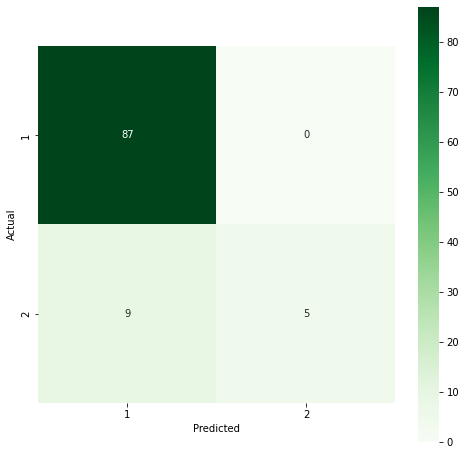

In [49]:
Y_pred = model.predict(A_test)
Y_true = y_test
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=cls_types, yticklabels=cls_types)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [50]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

TPR = TP / (TP+FN)
TNR = TN / (TN+FP)
precision = TP / (TP+FP)
recall=TP/(TP+FN)                  

In [51]:
G_mean = np.sqrt(TPR*TNR)
F_measure = (2*precision*TPR)/(precision+TPR)

print(G_mean)
print(F_measure)
print(precision)
print(recall)

0.5976143046671968
0.5263157894736842
1.0
0.35714285714285715


In [ ]:
print(A_train[total_S[best_iter],:])

[[0.38 0.3  0.48 0.5  0.43 0.29 0.39]
 [0.29 0.3  0.48 0.5  0.45 0.03 0.17]
 [0.75 0.55 1.   1.   0.4  0.47 0.3 ]
 [0.67 0.55 1.   0.5  0.66 0.58 0.16]
 [0.6  0.76 1.   0.5  0.77 0.59 0.52]
 [0.68 0.49 1.   0.5  0.62 0.55 0.28]
 [0.06 0.61 0.48 0.5  0.49 0.92 0.37]
 [0.49 0.61 1.   0.5  0.56 0.71 0.74]
 [0.66 0.49 1.   0.5  0.54 0.56 0.36]
 [0.7  0.39 1.   0.5  0.51 0.82 0.84]
 [0.6  0.5  1.   0.5  0.54 0.77 0.8 ]
 [0.61 0.47 0.48 0.5  0.   0.8  0.32]
 [0.1  0.49 0.48 0.5  0.41 0.67 0.21]
 [0.77 0.57 0.48 0.5  0.88 0.53 0.2 ]
 [0.   0.51 0.48 0.5  0.35 0.67 0.44]
 [0.75 0.76 0.48 0.5  0.83 0.57 0.3 ]
 [0.69 0.59 0.48 0.5  0.77 0.39 0.21]
 [0.46 0.59 0.48 0.5  0.36 0.76 0.23]
 [0.63 0.49 0.48 0.5  0.79 0.45 0.28]
 [0.12 0.67 0.48 0.5  0.74 0.58 0.63]
 [0.74 0.78 0.48 0.5  0.75 0.54 0.15]
 [0.4  0.45 0.48 0.5  0.38 0.22 0.  ]
 [0.5  0.66 0.48 0.5  0.31 0.92 0.92]
 [0.3  0.51 0.48 0.5  0.42 0.61 0.34]
 [0.56 0.68 0.48 0.5  0.77 0.36 0.45]
 [0.63 0.57 0.48 0.5  0.49 0.7  0.2 ]
 [0.72 0.86 

In [ ]:
print(y_train[total_S[best_iter]])

[1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2.]


In [ ]:
x1 = A_train[:, 0]
x2 = A_train[:, 1]
y1 = y_train.astype(int)
#plt.scatter(x1[y1==0], x2[y1==0], s=25, c='r')
#plt.scatter(x1[y1==1], x2[y1==1], s=25, c='b')
plot_decision_regions(A_train[total_S[best_iter],:], y_train[total_S[best_iter]], clf=model)

ValueError: ignored

In [ ]:
x3 = A_test[:, 0]
x4 = A_test[:, 1]
y2 = y_test.astype(int)
plt.scatter(x3[y2==0], x4[y2==0], s=25, c='green')
plt.scatter(x3[y2==1], x4[y2==1], s=25, c='orange')
plot_decision_regions(A_test, y_test, clf=model)

In [ ]:
from sklearn.model_selection import cross_val_score
x=A_train[total_S[best_iter]]
y=y_train[total_S[best_iter]]
model = svm.SVC(C=1000.0,kernel = "rbf", gamma =1/(2*sig))
cv_met=cross_val_score(model,x,y,cv=5,scoring=None)
print(cross_val_score(model,x,y,cv=5,scoring=None))

In [ ]:
from sklearn import metrics
cv_met=cross_val_score(model,x,y,cv=5,scoring='f1_macro')


In [ ]:
print(f"The cross-validation f1 is: {np.mean(cv_met)*100:.2f}%")